In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
mnist = tf.keras.datasets.mnist #28X28 images pf hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#We normalize the data
#The values are scaled between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#Build the model
#There are 2 types of model
#The Sequential model is the most common. It is the feed forward model
model = tf.keras.models.Sequential()

#First layer is going to be the input layer
#Our images are 28X28 in a multidimensional array
#In this case we want to flatten it
#If we were doing a CNN we might not want it to be flat
#We can use numpy to reshape or use one of the layers thats built into keras to flatten it
#Need to flatten it before reaching the end of the CNN
#To make our lives easier
model.add(tf.keras.layers.Flatten())

#We will add two hidden layers. This is not a complex problem to solve
#128 neurons in the layer
#Add the activation function to make the neuron fire or sort of fire
#Relu is rectified linear function is a standard function to use.
#This is the default go-to activation function. it's a pretty good one to fall back on
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Output layer has the number of classifications
#We use softmax for a probability distribution
#We have 10 classifications
#This is our entire model architecture
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#Now we need to define some parameters for the training of the model
#NNs are always trying to minimise loss
#Loss is the degree of error - what you got wrong
#The way you calculate loss makes a huge impact
#Neural Network doesn't try to optimise accuracy

#The optimiser we are going to use is the adam aptimiser. This is the default optimiser
#This is the most complex part of the NN

#Could use stochastic gradient descent for optimiser

#If there were cats and dogs could use a binary 

#What are the metrics we want to track? 'accuracy'

#adam is the one you should start with
#we want to track accuracy

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

#We are ready to train the model
model.fit(x_train, y_train, epochs=3)

In [ ]:
import matplotlib.pyplot as plt

print(x_train[0].shape)
plt.imshow(x_train[0], cmap = plt.cm.binary)
#print(x_train[0])

In [ ]:
#This was in sample. The question was did it overfit?
#Did the model learn patterns? Rather than memorising every single sample passed.

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

In [ ]:
model.save('epic_num_reader.model')

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
predictions = new_model.predict([x_test])

In [ ]:
#These are one-hot arrays probability distributions
print(predictions)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#The prediction for x_test[0] is 7

print(np.argmax(predictions[0]))

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [1]:
pip -V

pip 20.2.4 from C:\Users\Home\Anaconda3\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


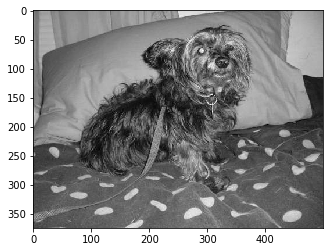

In [51]:
#to do array operations
import numpy as np
import matplotlib.pyplot as plt

import os

#to do some image operations
import cv2

DATADIR = "C:/Users/Home/Documents/Semester 3/Data Mining & Machine Learning 2/Project/PetImages/train/train"
CATEGORIES = ["Dog","Cat"]

#Iterate through all examples of dog and cat
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # gets us into the path for cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

In [54]:
print(img_array.shape)
print(img_array)

(375, 499)
[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]


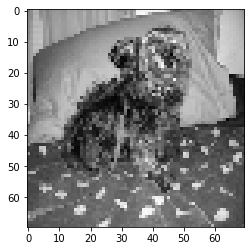

In [58]:
IMG_SIZE = 70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [59]:
training_data = []

#iterate through everything
#We have the features as numbers but our classification is not yet a number
#We need to map things to some sort of numerical value
#Say 0 is a dog and 1 is a cat

def create_training_data():
    #Iterate through all examples of dog and cat
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # gets us into the path for cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    
create_training_data() 

In [60]:
print(len(training_data))

25000


In [64]:
#The training dataset is all cats and all dogs so need to be shuffled
#Cats and Dogs are balanced 50:50 which is what we want
print(training_data[12499])

[array([[240, 242, 242, ..., 250, 251, 251],
       [253, 252, 250, ..., 252, 253, 253],
       [232, 231, 234, ..., 237, 240, 242],
       ...,
       [ 64,  76,  67, ..., 254, 254, 254],
       [ 87,  82,  72, ..., 254, 254, 254],
       [ 81,  75,  82, ..., 254, 254, 254]], dtype=uint8), 0]


In [67]:
import random
#We shuffle the training data
random.shuffle(training_data)

In [73]:
#This takes the first 10 images in the training data and prints the classification
#0 for dog and 1 for cat
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
0
1
1
1


In [75]:
#Now that it's shuffled lets pack it into the variables that we're going to use 
#before we feed it into our neural network

#X is our feature set
X = []
#y is our labels
y = []

In [79]:
#X contains the features and y contains the labels
for features, label in training_data:
    X.append(features)
    y.append(label)

#We can't pass a list to the neural network
#X has to be a numpy array
#-1 is how many features (any number)
#shape of the data is IMG_SIZE X IMG_SIZE
#1 is because it's gray scale
#(make this work with colour images) Change the 1 to a 3
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [87]:
import pickle

#This saves X
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

#This saves y
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [83]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [89]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
